# Minería de Datos

## Grado en Ingeniería Informática
## Universidad de Burgos
## José Francisco  Diez
## Curso 2016-2017

In [1]:
%matplotlib inline

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Scikit Learn 

Scikit Learn es una librería que implementa multitud de algoritmos de minería de datos, preprocesamiento, validación de métodos y visualización.

Apartados de la lección
- Carga de datos
- Uso básico de sklearn
- Aprendizaje Supervisado
    - Calibrado de parámetros
- Aprendizaje No Supervisado
- Evaluación
- Otros (Reducción de la dimensionalidad, procesado)



## Cargar datos

A parte de los propios datos que incluye de ejemplo permite cargar cualquier tipo de array de NumPy, matrices de Scipy o DataFrames de Pandas.

Primero vemos como son los datasets que se incluyen de ejemplo.

Un dataset en sklearn es lo siguiente:
- data
- target
- feature_names
- target_names

Podemos probar alguno de los datasets que vienen de ejemplo.
Todos los datasets se encuentran en el módulo **sklearn.datasets**. Podemos ver una descripción en http://scikit-learn.org/stable/datasets/

In [3]:
from sklearn import datasets

# El dataset iris
iris = datasets.load_iris()
print(iris.data[:10]) # muestro las 10 primeras fílas y columnas
print(iris.target[:10])
print(iris.feature_names)
print(iris.target_names)


[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
[0 0 0 0 0 0 0 0 0 0]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


### Creando nuestros propios datasets

Para crear nuestro propio dataset solo necesitamos una variable X (numInstancias x numAtributos) y una varaible y (numInstancias).
Todo lo demás sería opcional

Vamos a usar pandas.

In [4]:
import pandas as pd
df=pd.read_csv('iris.csv')

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
train_data = df.drop(["Class"], axis=1)
train_data = train_data.values
# Solo queremos los datos
train_data[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [6]:
target_data = df["Class"].values
target_data[:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

# Uso básico de un clasificador en Scikit learn

El uso básico de un clasificador en Scikit-learn:
- Entrenar un clasificador
- Usar el clasificador para predecir una nueva instancia
- Usar persistencia para guardar y recuperar un clasificador guardado.

En Scikit-learn todos los modelos tanto supervisados como no supervisados se entrenan con el método **fit** 
- En supervisado recibe atributos y clase
- En no supervisado recibe solo los atributos
Y se hacen predicciones con el método **predict** que recibe un array de 2 dimensiones con tantas instancias como se quiera predecir.

In [7]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100)

In [8]:
# Entrenamiento
# X = train_data
# y = target_data
forest = forest.fit(train_data, target_data)

In [9]:
# Haciendo la predicción

prediccion = forest.predict([[4.4, 2.9, 1.4, 0.2]])
prediccion

array(['Iris-setosa'], dtype=object)

In [10]:
import numpy as np
# Observa que se le pasa en realidad un array 2D
# A predict se le pasa un array de instancias, 
# aunque solo queramos predecir una
np.array([[4.4, 2.9, 1.4, 0.2]]).shape

(1, 4)

### Serializar

Después de entrenar un modelo es recomendable guardarlo para un futuro, para no tener que reentrenarlo cada vez que se quiera usar.
Es posible serializar y deserializar modelos usando el modelo de persistencia de Python: Pickle

- Con **dump** se guarda el objeto que queramos en un determinado fichero.

- Con **load** se recupera un objeto desde un fichero y se almacena en una variable.



In [11]:
import pickle # serializar y deserializar

# Un modelo entrenado con los parámetros óptimos y listo para usar
forestDefinitivo = forest.fit(train_data, target_data)

filename = 'randomForest.sav'
#guardamos
pickle.dump(forestDefinitivo, open(filename, 'wb'))


Posteriormente solo tendremos que cargar el clasificador en nuestra aplicación (Una sola vez, al cargar el programa).
Lo cargamos una vez al iniciar el programa y lo usamos siempre que queramos.
La magic de Jupyter ``%%time`` sirve para saber el tiempo que tarda en ejecutarse una celda. Vemos que cargar un modelo es mucho más rápido que entrenarlo nuevamene.

In [12]:
%%time
# cuando arranca la aplicación se carga
loaded_model = pickle.load(open(filename, 'rb'))

CPU times: user 3.72 ms, sys: 3.95 ms, total: 7.67 ms
Wall time: 8.13 ms


Posteriormente la aplicación le pasaría instancias al clasificador y este los clasificaría sin problemas.

In [13]:
loaded_model.predict([[4.4, 2.9, 1.4, 0.2]])


array(['Iris-setosa'], dtype=object)

### Consideraciones

Scikit learn proporciona una alternativa a pickle que es mucho más eficiente para trabajar con objetos que contienen una grán cantidad de arrays de NumPy.

```Python
from sklearn.externals import joblib

joblib.dump(clf, 'filename.pkl') 

... 
clf = joblib.load('filename.pkl') 
```

Nunca se debería cargar unos datos de una fuente no segura, ya que el modelo podría venir con código malicioso incluido.

Aunque se pueden cargar modelos de una versión en otra, puede ocurrir que modelos de versiones diferentes tengan un comportamiento diferente. Así que es buena idea serializar el modelo incluyendo en algún sitio metadatos sobre el número de versión.


# Aprendizaje Supervisado

En las siguientes subsecciones se van a revisar algunos de los algoritmos de aprendizaje supervisado más usados y que están presentes en Sklearn.

## Naive Bayes

Los modelos Naive Bayes son un grupo de algoritmos rápidos y sencillos que a menudo funcionan muy bien para conjuntos de datos de **alta dimensionalidad** (un gran número de atributos). Son sencillos de utilizar porque tienen muy pocos parámetros ajustables. Están basados en el teorema de Bayes.

### Gausian Naive Bayes

El más simple de todos los algoritmos es el **Gaussian naive Bayes** que asume que los datos de cada clase siguen una distribución gausiana.

Imagines que tenemos los siguientes datos:




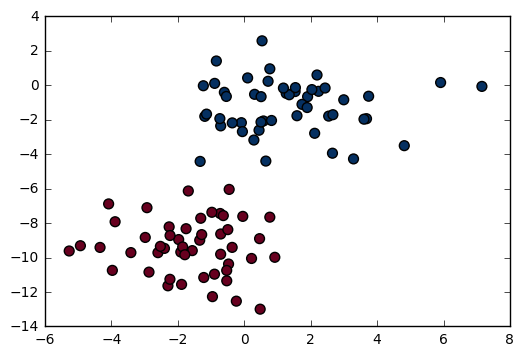

In [14]:
import matplotlib.pyplot as plt

# make_blobs permite crear nubes de puntos de forma esférica
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');



Este clasificador simplemente encuentra la media y la desviación estandar de los datos de cada clase. 

El radio de estas eclipses representa la probabilidad de pertenencia a cada clase asignada por el **Gaussian naive Bayes**.






[(-15, 5), (-8, 8)]

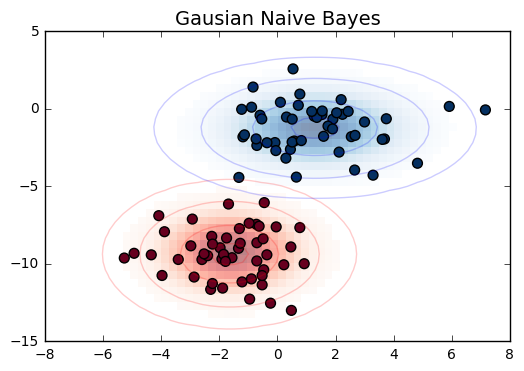

In [15]:
# https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/06.00-Figure-Code.ipynb
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Gausian Naive Bayes', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);


### Multinomial Naive Bayes

Otro algoritmo bayesiano es **Multinomial Naive Bayes**. En este caso se asume que las características (los atributos) siguen una distribución multinomial.

La distribución multinomial describe a una variable aleatoria que  puede tomar más de dos resultados. Como por ejemplo un dado. (Una moneda sería binomial)


Esta distribución es apropiada para atributos que representen conteos o tasas. Por ejemplo frecuencias de palabras. Lo veremos en detalle en el tema de clasificación de textos.



In [17]:
import numpy as np

# X es un ejemplo de un dataset formado con atributos que tienen 
# distribución binomial
X = np.random.randint(5, size=(6, 10))
print(X)
y = np.array([1, 2, 3, 4, 5, 6])


[[3 1 4 0 2 2 2 1 1 0]
 [4 3 4 4 4 4 1 0 1 4]
 [3 2 3 3 2 3 3 2 3 4]
 [3 4 4 4 0 1 2 1 0 3]
 [0 1 4 1 1 1 0 4 3 2]
 [3 2 4 4 3 3 2 4 3 1]]


In [18]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
# los clasifica correctamente
print(clf.predict(X))

[1 2 3 4 5 6]


### Ventajas/ Desventajas 

- Extremadamente rápido tanto en entrenamiento como en predicción
- Fácil de usar, pocos parámetros.

### Cuando usar Naive Bayes

- Simpre, para tener una linea base a la que batir despues con algoritmos más sofisticados.
- Cuando se cumplan las asumpciones del algoritmo (los atributos siguen una distribución multinomial (ej frecuencias))
- Cuando las clases estén bien separadas.
- Cuando la dimensionalidad de los datos sea alta.



##  Regresión Lineal

Si bayes es un primer punto de partida para clasificación. Regresión lineal lo es para regresión.

Son rápidos y fáciles de interpretar.



In [20]:
# https://github.com/justmarkham/DAT3
# Cargar los datos como un dataframe (desde internet)
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


En este conjunto de datos se tiene como atributos la cantidad gastada en publicidad en cada uno de los distintos tipos de medios de comunicación.

Y la clase son las ventas en millones de dolares del producto anunciado.



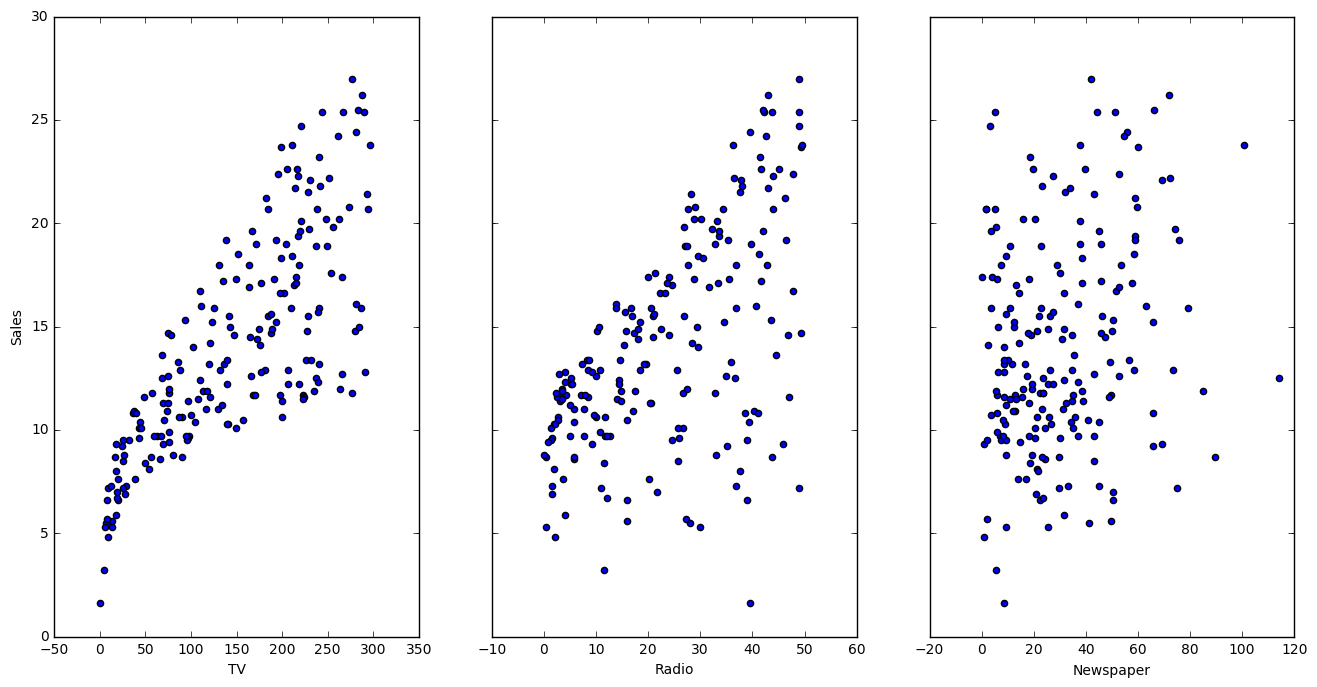

In [21]:
# Visualización entre los atributos y el valor a predecir
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [22]:
# El conjunto de entrenamiento X los atributos 'TV', 'Radio' y 'Newspaper'
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
# y van a ser las ventas
y = data.Sales

# Se importa LinearRegression y se entrena con fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# Accedemos a los coeficientes de cada uno de los atributos y al término independiente

print("Término independiente ",lm.intercept_)
print("Coeficientes")
list(zip(feature_cols, lm.coef_))


Término independiente  2.93888936946
Coeficientes


[('TV', 0.04576464545539758),
 ('Radio', 0.1885300169182047),
 ('Newspaper', -0.0010374930424762729)]

In [24]:
#Obtenemos la predicción del primer ejemplo

# ejemplo es la primera instancia
ejemplo = X.iloc[0]
tv = ejemplo[0]
radio = ejemplo[1]
periodico = ejemplo[2]
print(ejemplo)
# predicción con el modelo
lm.predict([[tv,radio,periodico]])

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 1, dtype: float64


array([ 20.52397441])

In [25]:
# obtenemos la interpretación
tv*lm.coef_[0]+radio*lm.coef_[1]+periodico*lm.coef_[2]+lm.intercept_



20.523974409715166

## Support Vector Machines

Las máquinas de soporte de vectores o SVM, son un algoritmo muy potente y flexible que se puede usar tanto para clasificación como para regresión.

En clasificación se trata de un clasificador lineal trata de separar las dos clases del conjunto de datos usando una linea recta.

Para un conjunto de datos como el que tenemos aquí enseguida vemos que hay más de una forma de dividir las dos clases.


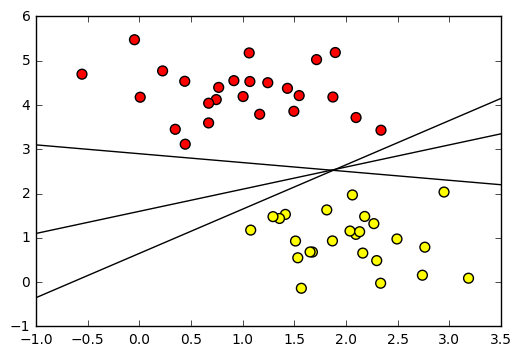

In [26]:
'''
make_blobs permite crear datasets personalizados.

En este caso el dataset tendrá 50 instancias en 2 nubes de puntos
'''

from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

xfit = np.linspace(-1, 3.5)

# Se muestran los dos primeros atributos del conjunto de datos
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Se muestran tres lineas con 3 pendientes diferentes
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Aquí vemos tres separadores lineales que son diferentes pero completamente separan los datos de las clases en el conjunto de entrenamiento.

Sin embargo dependiendo de cual se elija, una nueva instancia va a pertenecer a una clase o a otra. Simplemente separar las clases no es suficiente. Aquí es donde surge la intuición detrás de los SVM, los SVM tratan de maximizar el margen entre las clases.

### Maximizando el margen entre las clases.


En las máquinas de soporte de vectores se elige como discriminador la linea que maximiza el margen entre las clases. El margen podríamos definirlo como una franja formada por la región del espacio que está a una distancia $d$ del discriminante lineal (la linea que separa las clases)


Vamos a crear un modelo SVM con el conjunto de datos anterior. El tipo de kernel va a ser lineal y $C$ un valor muy grande (más adelante veremos que es $C$).



In [27]:
from sklearn import svm

# SVC es simplemente una implementación de SVM multiclase.
model = svm.SVC(kernel='linear', C=1E10)
model.fit(X, y)

print("SVM con C =",1E10)

SVM con C = 10000000000.0


La siguiente función visualiza lo que ocurre en el SVM. 

Va a mostrar la frontera de decisión, el margen y los vectores soporte



In [28]:
def plot_svc_decision_function(model, plot_support=True):
    """Dibuja la frontera de decisión de un SVC en 2 dimensiones"""
    
    # Crea los ejes de la figura
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # crea un conjunto de datos artificial en forma de rejilla 2D
    # para evaluar el modelo en cada punto
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
    #xy es el conjunto de datos rejilla
    
    
    '''
    decision_function(X)
    Recibe los atributos de un conjunto de datos (n_samples , n_features)
    Devuelve las distancias de cada una de las instancias con 
    cada uno de los hyperplanos del SVM
    
    Las distancias son un array (n_samples, n_classes * (n_classes-1) / 2)
    Con dos clases n_classes * (n_classes-1) = 1, solo hay un hyperplano
    '''    
    P = model.decision_function(xy).reshape(X.shape)
    
    
    '''
    Diagrama curvas de nivel. 
    Dibuja una línea continua cuando el valor de P (distancia) es 0
    Esa linea continua representa el propio hyperplano
    
    Dibuja dos lineas discontinuas a distancia 1 del hyperplano
    '''
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], 
               alpha=0.5,
               linestyles=['--', '-', '--'])
    
    
    # Dibuja los vectores soporte, que se obtienen con support_vectors_
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    


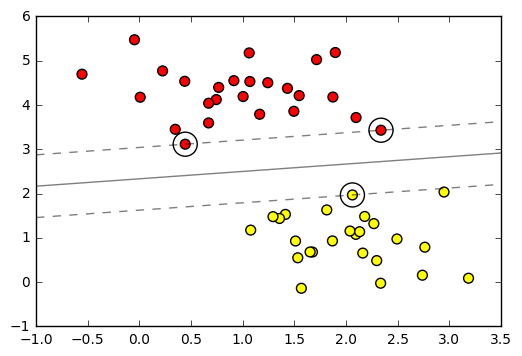

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

La linea continua es el hiperplano que maximiza el margen entre las intancias de ambas clases.

Existen unos pocos puntos que tocan el margen. Están señalados con pequeños círculos. Esos puntos se conocen como *support vectors*.

En Sklearn se pueden obtener con el método **support_vectors\_**

Durante el entrenamiento del clasificador, solamente la posición de los *support vectors* importa. Cualquier punto más lejano que los *support vectors* no modifica el proceso de entrenamiento.



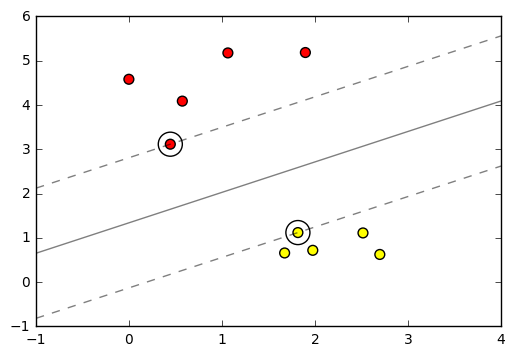

In [30]:
def plot_svm(N=10):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = svm.SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model)

interact(plot_svm, N=[10, 200]);

En este widget se puede cuales son los *support vectors* con subconjuntos del conjunto de entrenamiento de distinto tamaño.

Se puede ver como una vez que una vez el subconjunto es lo suficientemente grande el modelo cambia muy poco o no cambia al añadir más puntos. Los SVM son insensibles al ruido y pequeños cambios en los datos. Son clasificadores estables (luego veremos que los árboles son inestables).


### Kernel SVM

Los SVM tienen su fortaleza cuando se combinan con kernels. Con los kernels los datos se proyectan en en un espacio de mayor dimensionalidad definido por polinomios o por RBF (radial base functions) y de este modo se puede encontrar relaciones no lineales usando un clasificador lineal.


Veamos un ejemplo de datos que no pueden separados con un clasificador lineal.

La función **make_circles** genera dos circulos, con el número de puntos especificados y la relación de escala del circulo grande entre el pequeño definida por *factor* (con factor = .1 el circulo grande tiene un diametro 10 veces mayor que el pequeño). 

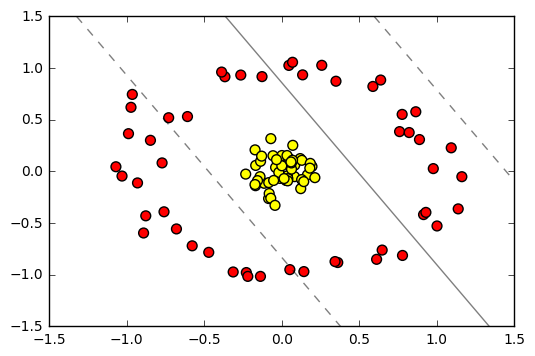

In [31]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Esta claro que no hay una linea recta capaz de separar estos datos.

Pero se pueden crear nuevos atributos usando RBF. RBF es una función real cuyo valor depende sólo de la distancia a un centro.


Función de base radial de base gausiana

$ϕ (r)=e^{-(\varepsilon r)^{2}}$
https://es.wikipedia.org/wiki/Funci%C3%B3n_de_base_radial



r es el valor de la RBF con centro en el origen.

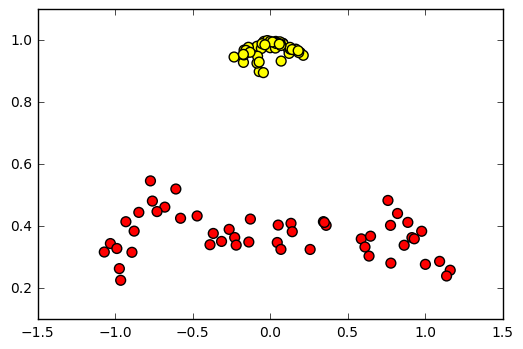

In [32]:
r = np.exp(-(X ** 2).sum(1))
plt.scatter(X[:, 0], r, c=y, s=50, cmap='autumn')

Ahora en esta dimensión adicional los datos son separables cuando r=0.7.

Hay que elegir cuidadosamente la proyección. Si la función de base radial no está centrada correctamente podriamos no conseguir separar los datos linealmente. Este tipo de elección es complicada, por eso se realiza automáticamente

Una estrategía es calcular una función de base radial centrada en cada uno de los puntos del dataset y dejar al SVM examinar los resultados para buscar las proyecciones que permiten separar los datos. El problema de esta estrategía es que es muy costosa: proyectar $N$ instancias en $N$ dimensiones. Aunque un algoritmo llamado kernel trick permite entrenar el SVM sin calcular explicitamente todas las dimensiones.

En Scikit-Learn esto se puede hacer simplemente cambiando el kernel lineal por un RBF (radial basis function) kernel.

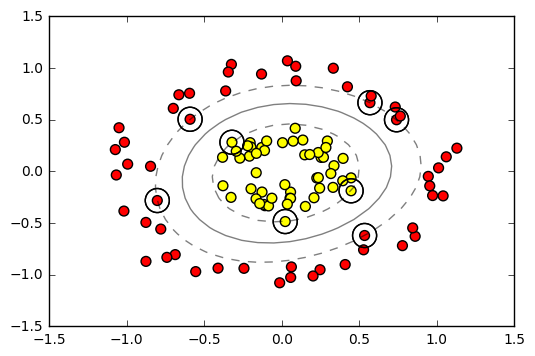

In [33]:
def plot_RBF(N,factor,noise):

    X, y = make_circles(N, factor=factor, noise=noise)
    clf = svm.SVC(kernel='rbf', C=1E6).fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(clf)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    
#plot_RBF(100,.1,0.1)   
interact(plot_RBF, N=[10, 200], factor=[0.1,0.5], noise=[0.01,0.2,0.01]);

El uso de kernels se usa en minería de datos para transformar métodos lineales en no-lineales.

### Ajustar los margenes

Hasta ahora hemos tenido datasets fáciles con fronteras de decisión totalmente limpias.

Pero ¿que ocurre cuando el conjunto de datos tiene solape entre las clases?



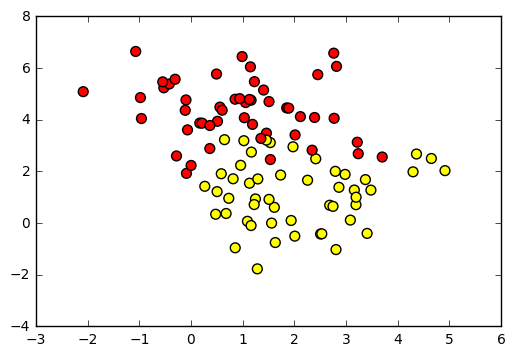

In [34]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Para manejar estas situaciones los SVM tienen un parámetro que relaja o suaviza el margen, para permitir a algunos ejemplo ocupar la zona del margen si es necesario.

El parámetro que controla lo estricto o relajado que es el margen es el parámetro $C$. Con valores altos de $C$ el margen es estricto y ninguna instancia puede ocupar esa zona. Para valores pequeños el margen es suave y permite que haya algunas instancias.




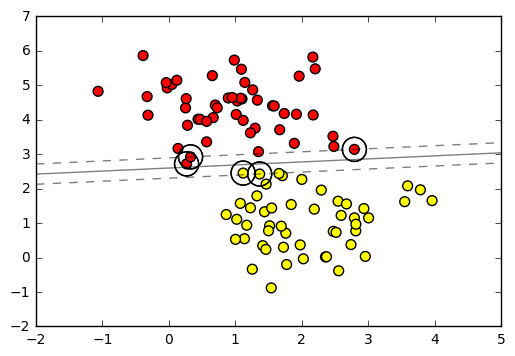

In [35]:
def plot_margin(N,kernel,cluster_std,C):

    X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=cluster_std)
    
    model = svm.SVC(kernel=kernel, C=C).fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model) 
    plt.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    
    
# cluster_std representa la concentración de los puntos de cada clase
# un cluster_std bajo representa nubes muy agrupadas
interact(plot_margin, N=[10, 200], kernel=["linear","rbf"], cluster_std=[0.4,1.2], C = [0.1,10]);

The optimal value of the $C$ parameter will depend on your dataset, and should be tuned using cross-validation or a similar procedure (refer back to Hyperparameters and Model Validation).

## Árboles de Decision y Random Forests

Los árboles de decisión son un algoritmos muy sencillos y eficientes para clasificar objetos. Se basan en particionar el espacio de manera recursiva. En cada nodo del árbol se divide el conjunto de datos en dos partes, usando un punto de corte que es un valor de uno de los atributos.

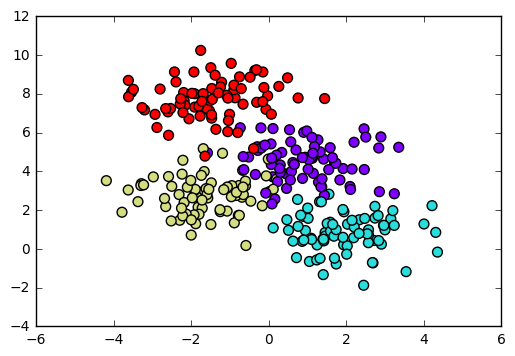

In [36]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

El conjunto de datos mostrado arriba se divide progresivamente a lo largo de uno de los ejes. 
La elección del eje y punto de corte se hace de acuerdo a un criterio de calidad que puede ser 'gini' o 'entropy' en Sklearn.

Los árboles de decisión se encuentran en el modulo **DecisionTreeClassifier** del paquete **sklearn.tree**


In [37]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

El siguiente código permite visualizar las fronteras de decisión creadas por el árbol

In [38]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Muestra las instancias del conjunto de entrenamiento
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # construye el árbol
    model.fit(X, y)
    
    # crea un conjunto de datos artificial uniformemente distribuido en rejilla
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    # predice las clases del conjunto de datos artificial
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Utiliza los valores y clase del conjunto artificial en rejilla
    # para crear un diagrama de contornos
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

<function __main__.arbolPersonalizado>

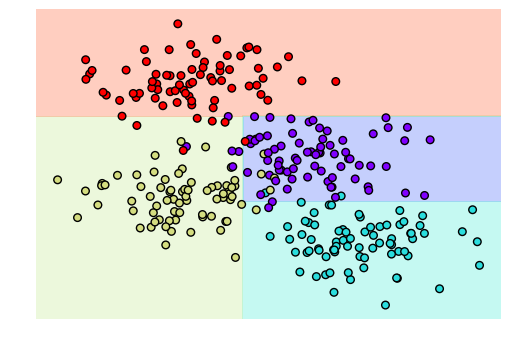

In [39]:
'''
El parámetro min_samples_leaf regula el mínimo número de instancias 
necesarias para crear una hoja

Con valores pequeños creará muchas hojas.
Con valores grandes algunos nodos no se dividirán en dos 
porque no se alcanza el tamaño mínimo

'''
def arbolPersonalizado(min_samples_leaf):
    tree=DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    visualize_classifier(tree, X, y)



interact(arbolPersonalizado,min_samples_leaf=(1,85))


### Ventajas y desventajas

#### Ventajas 
- Simples de entender e interpretar.
- Se pueden visualizar (exporta a .dot {graphviz})
- Es muy eficiente. 
- Trabaja tanto con datos numéricos como nominales.
- Es capaz de manejar problemas multilabe y multisalida.

#### Desventajas
- Puede sobreajustar. 
- Son inestables, pequeños cambios en los datos provocan grandes cambios en el resultado.
- Hacen los cortes usando solamente uno de los ejes. Problemas tan sencillos como el XOR no se pueden resolver con árboles.
- Son muy sensibles a desequilibrio en los datos (una clase mucho más grande que otra).



### Consejos.

- Si tenemos muchos atributos y pocos ejemplos, tiende a sobreajustar. Es necesario obtener más instancias o reducir los atributos usando PCA, ICA o alguna técnica de selección de atributos.

- Se puede usar max_depth para controlar la profundidad del árbol y evitar que sobreajuste.

- Se puede usar min_samples_leaf para evitar que construya hojas muy pequeñas, un valor igual a 5 puede ser adecuado.

- Si hay desequilibrio en las clase tratalo antes de aplicar el árbol.



## Random Forest

Los Random Forest son un ejemplo de ensemble. Se basan en la idea de que la combinación de árboles da mejor resultado que el mejor de los árboles que lo forma. 

La idea de que varios predictores con sobreajuste pueden ser combinados en uno solo con un sobreajuste reducido se basa en el método Bagging.

Random Forest es Bagging de ramdom trees.

Pero en Sklearn tambien se puede utilizar bagging por separado. El módulo **BaggingClassifier** está en el paquete **sklearn.ensemble**


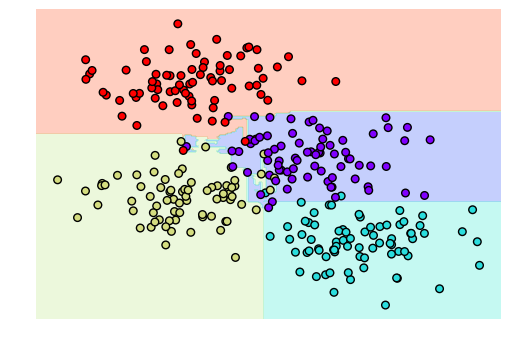

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()


bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)


En el ejemplo de arriba, cada uno de los 100 árboles se construye con un subconjunto aleatorio del conjunto de datos con el 80% del tamaño original.

Bagging de árboles de decisión aporta algo de aleatoriedad a como se realiza cada uno de los cortes, debido a el conjunto de entrenamiento de cada uno de los clasificadores base.

Random Forest complementa esta aleatoriedad haciendo que la selección del atributo de corte no sea determinista, sino que se haga sobre un subconjunto de atributos aleatorio.

En Scikit-Learn, el algoritmo se encuentra en **RandomForestClassifier**

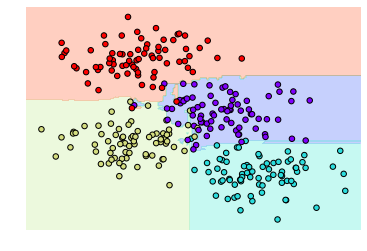

In [41]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

Random fores puede ser tambien utilizado para tareas de regresión.
La sintaxis es similar solo que el módulo utilizado sería **RandomForestRegressor**

### Ventajas y desventajas de Random Forest

#### Ventajas
- Es muy rápido en entrenamiento y en predicción. Los árboles que lo forman son independientes entre sí y pueden entrenarse en paralelo.
- La votación de multiples árboles permite obtener probabilidades para cada clase. Se pueden acceder con el método **predict_proba()**  
- Funciona bastante bien en casos donde otros modelos no consiguen ajustarse correctamente a los datos.

#### Desventajas
- Los resultados dejan de ser interpretables fácilmente. 


# Aprendizaje No Supervisado

Hay varios algoritmos de clustering que se pueden elegir en Sklearn. El tipo de algoritmo que se debe elegir depende de los datos a los que se quiere aplicar.

Algunos algoritmos son son específicos para hacer clustering con textos, otros con un tipo particular de datos etc. 

La mayoría de las veces no conocemos los datos lo suficientemente bien como lara elegir el tipo de clustering, pero tenemos una serie de reglas:

- Conservador. Es mejor no obtener resultados a obtener resultados malos. Un buen algoritmo de clustering tiene que ser 'conservador'. Es preferible que no asigne instancias a un cluster a que lo haga erroneamente.

- Parámetros intuitivos. Son preferibles los algoritmos que permiten elegir los parámetros sin saber demasiado de los datos.

- Estable: Un algoritmo de clustering es estable si al ejecutar el algoritmo varias veces se obtiene más o menos la misma asignación de clusters.

- Rendimiento: Son preferibles los algoritmos de clustering que son capaces de trabajar con grandes conjuntos de datos, de lo contrario nos veremos obligados a trabajar con un subconjunto de los datos.

## K-Means

K-Means es el método de referencia porque es rápido, fácil de entender y está disponible en multitud de paquetes software.

<!---


Sin embargo tiene algunos problemas. 
- No es estrictamente un algoritmo de clustering, porque en lugar de *'encontrar clusters'*, lo que hace es particionar el espacio en regiones esfericas, tratando de minimizar la distancia intra-partición (la distancia de las instancias asignadas a cada partición entre si).
- El número de clusters tiene que ser proporcionado por el usuario. Lo que puede ser un problema si no conocemos el conjunto de datos. Una opción es probar con varios número de clusters diferentes. Ir incrementando el número de clusters hasta que vemos que empieza a empeorar. Encontrar el número de clusters no es fácil.

- Es dependiente de la inicialización. Empieza eligiendo semillas aleatoriamente y puede acabar encontrando diferentes clusters en cada ejecución.
-->

En resumen:
-  Conservador:  K-Means va a asignar todos los puntos a clusters, pertenezcan a un cluster o no. Y además asume que los clusters son esféricos.
- Parámetros intuitivos: Si no conoces el número de clusters en tu dataset es un problema.
- Estable: No siempre es estable.
- $\checkmark$ Rendimiento: Es simple y puede ser muy rápido y eficiente. 
 
---------------------



## Affinity Propagation

<!---

Es un algoritmo más moderno que utiliza un grafo para permitir 'votar' a cada instancia cual es su 'ejemplo favorito'. El resultado es un conjunto de favoritos a partir de los cuales se derivan los clusters, asignando clada instancia a ejemplo favorito más cercano.

Se podría ver como una mejora de K-Means en la que:

- No es necesario especificar el número de clusters.
- Al usar un grafo existen disimilaridades que no son métricas (una instancia x puede ser la favorita de y, y no serlo de x). Esta es una ventaja porque muy pocos algoritmos son capaces de trabajar con disimilaridades que no son métricas.
- Es más estable.

Pero comparte con K-Means el problema de que asigna todas las instancias a un cluster, incluso las que no pertenecen a ninguno en la realidad.

Aunque no hay que especificar el número de clusters, tiene dos parámetros: **‘preference’** y **‘damping’**, que son díficiles de ajustar.

Y por último es un algoritmo muy lento y no escala bien.
-->

En resumen:
- Conservador: Va a asignar todos los puntos a clusters, pertenezcan a un cluster o no. Y además asume que los clusters son esféricos.
- Parámetros intuitivos: Es muy sensible a los valores de los parámetros y son dificiles de ajustar.
- Estable $\checkmark$ Es determinista.
- Rendimiento. Es muy lento. En conjuntos muy grandes puede ser imposible de aplicar.




-------------------------------




## Mean shift 


En resumen:
- Conservador: No asigna clusters a todas las instancias, pero todavía busca clusters de forma esférica.
- Parámetros intuitivos $\checkmark$. Sus parámetros son intuitivos. Tiene un parámetro *bandwidth*, que representa el tamaño de los clusters.
- Estable: El parámetro *bandwidth* afecta mucho el funcionamiento, y además tiene una inicialización aleatoria.
- Rendimiento. Es lento.

## Spectral Clustering


En resumen:
- Conservador: No asume que los clusters son esféricos. Pero asigna todas las instancias a un cluster.
- Parámetros intuitivos: Al igual que K-Means, necesita un número de clusters por parte del usuario.
- Estable: Un poco más estable que K-Means.
- Rendimiento: Más lento que K-Means.

## Agglomerative Clustering

En realidad es un conjunto de algoritmos que están todos basados en la misma idea. Se parte inicialmente de hay tantos clusters como instancias y que cada instancia pertenece a su propio cluster. Y repetidamente para cada cluster elige otro cluster con el que combinarse. Hasta que se obtiene una jerarquia o árbol de clusters.


En resumen:
- Conservador: No asume que los clusters son esféricos. Pero asigna todas las instancias a un cluster.
- Parámetros intuitivos: Al igual que K-Means, necesita un número de clusters por parte del usuario.
- Estable $\checkmark$: Es estable.
- Rendimiento $\checkmark$: Es eficiente.





## DBSCAN


En resumen:
- Conservador $\checkmark$ No asume que los clusteres son esfericos y no asigna todas las intancias a clusters.
- Parámetros intuitivos: El parámetro epsilo es una distancia que no es especialmente fácil de ajustar,
- Estable $\checkmark$ Es estable.
- Rendimiento $\checkmark$ Pocos algoritmos son capaces de trabajar con conjuntos tan grandes.





http://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html

In [42]:
import sklearn.cluster as cluster
import time
import matplotlib
plot_kwds = {'alpha' : 0.5, 's' : 20, 'linewidths':0}

In [43]:
dataCluster = np.load('clusterable_data.npy')

In [44]:
import matplotlib.cm as cmx
import matplotlib.colors as colors

def get_cmap(N):
    '''Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.'''
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color


def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    # Con seaborn
    #palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    #colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    # Con matplotlib
    palette = get_cmap(np.unique(labels).max() + 1)
    colors = [palette(x) if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    
    
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters encontrados por {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Ejecutado en {:.2f} s'.format(end_time - start_time), fontsize=14)
    



<function __main__.plot_clustersWrapper>

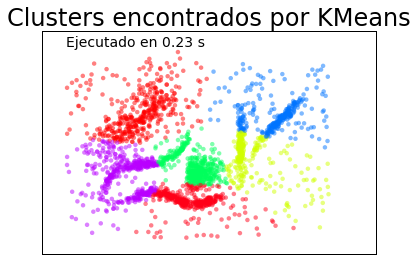

In [45]:
clusterParams = {
    "KMeans": [cluster.KMeans,(),{'n_clusters':6}],
    "AffinityPropagation": [cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95}],
    "MeanShift":[cluster.MeanShift, (0.175,), {'cluster_all':False}],
    "SpectralClustering":[cluster.SpectralClustering, (), {'n_clusters':6}],
    "AgglomerativeClustering":[cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'}],
    "DBSCAN":[cluster.DBSCAN, (), {'eps':0.025}]
}

def plot_clustersWrapper(data,name):
    options=clusterParams[name]
    plot_clusters(data, options[0], options[1], options[2])

    



interact(plot_clustersWrapper,data=fixed(dataCluster),name=list(clusterParams.keys()))




## Calibrado de parámetros


En minería de datos, en aprendizaje supervisado, se identifican dos fuentes de error: bias y varianza. 

- Bias: Está asociado al método de aprendizaje. Todos los algoritmos de aprendizaje hacen asumpciones erroneas. Un bías alto significa que el método no se ajusta a los datos, no encuentra las relaciones entre los atributos y la clase (underfitting).

- Varianza: Es el valor debido al conjunto de entrenamiento. Se produce cuando tenemos ruido en el conjunto de datos y el clasificador se ajusta al ruido (overfitting). 

Por lo general, los modelos tienen algún parámetro que regula su funcionamiento. Los valores optimos de los parámetros no se aprenden y hay que buscarlos.

Los parámetros de los métodos de aprendizaje se denominan a menudo hyperparámetros.

Scikit-Learn proporciona una manera herramienta para buscarlos.

Una búsqueda consiste en: 
- Un estimador o modelo (clasificador o regresor como sklearn.svm.SVC())
- Un espacio de búsqueda
- Un método de búsqueda.
- Un esquema de cross-validación
- Una función de score (ej accuracy (tasa de acierto)).

Hay principalmente dos métodos de búsqueda en scikit-learn:
- GridSearchCV: Búsca en todas las combinaciones de parámetros.
- RandomizedSearchCV: Utiliza una búsqueda aleatoria, de acuerdo a una determinada distribución.

In [46]:
# Examinando los parámetros de KNN y SVM
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors=1)
print("Parámetros de KNN")
print(modelo_knn.get_params())

modelo_SVM = svm.SVC()
print("Parámetros de SVM")
print(modelo_SVM.get_params())




Parámetros de KNN
{'metric': 'minkowski', 'p': 2, 'leaf_size': 30, 'weights': 'uniform', 'n_neighbors': 1, 'algorithm': 'auto', 'n_jobs': 1, 'metric_params': None}
Parámetros de SVM
{'decision_function_shape': None, 'max_iter': -1, 'verbose': False, 'coef0': 0.0, 'class_weight': None, 'probability': False, 'random_state': None, 'tol': 0.001, 'kernel': 'rbf', 'C': 1.0, 'cache_size': 200, 'shrinking': True, 'degree': 3, 'gamma': 'auto'}


### GridSearchCV

Este método de búsqueda genera los candidatos a partir de una rejilla de valores específicos indicados con el parámetro *param_grid*

Por ejemplo:

```Python

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
```
Especifica 2 rejillas. 
En la primera se probará:
- Kernel lineal - C = 1
- Kernel lineal - C = 10
- Kernel lineal - C = 100
- Kernel lineal - C = 1000

En la segunda 
- Kernel RBF - C = 1 - gamma = 0.001
- Kernel RBF - C = 1 - gamma = 0.0001
- ...
- Kernel RBF - C = 1000 - gamma = 0.0001


GridSearchCV evalua todas las combinaciones y guarda la mejor.

In [47]:
# Atención, es muy lento. Por eso lo hago con iris, que es pequeño
from sklearn.model_selection import GridSearchCV

X = iris.data
y = iris.target

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

clf = GridSearchCV(svm.SVC(), param_grid, cv=2, n_jobs=4)
clf.fit(X, y)

GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [48]:
print("Los mejores parámetros encontrados son:")
print()
print(clf.best_params_)
print()
print("Rejilla de scores de cada uno de los parámetros:")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print()

Los mejores parámetros encontrados son:

{'C': 10, 'kernel': 'linear'}

Rejilla de scores de cada uno de los parámetros:
0.967 (+/-0.040) for {'C': 1, 'kernel': 'linear'}
0.980 (+/-0.013) for {'C': 10, 'kernel': 'linear'}
0.960 (+/-0.053) for {'C': 100, 'kernel': 'linear'}
0.960 (+/-0.053) for {'C': 1000, 'kernel': 'linear'}
0.913 (+/-0.013) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.001}
0.913 (+/-0.013) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.0001}
0.920 (+/-0.027) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.001}
0.913 (+/-0.013) for {'C': 10, 'kernel': 'rbf', 'gamma': 0.0001}
0.960 (+/-0.027) for {'C': 100, 'kernel': 'rbf', 'gamma': 0.001}
0.920 (+/-0.027) for {'C': 100, 'kernel': 'rbf', 'gamma': 0.0001}
0.967 (+/-0.040) for {'C': 1000, 'kernel': 'rbf', 'gamma': 0.001}
0.960 (+/-0.027) for {'C': 1000, 'kernel': 'rbf', 'gamma': 0.0001}



### RandomizedSearchCV

Aunque GridSearch es el método más utlizado, la búsqueda aleatoria puede tener beneficios:
- El coste de búsqueda es independiente del número de parámetros y de sus posibles valores.
- Añadir parámetros que no influyen en el rendimiento del método no afecta a la calidad de la solución encontrada.

Se necesita:
- Un diccionario de parámetros. Asocia cada parámetro con una distribución aleatoria.
- Un número de iteraciones

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import randint as sp_randint

# Constructor del random forest
clf = RandomForestClassifier(n_estimators=20)



# especifica los parámetros y su distribución
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 4), # entero aleatorio entr 1 y 4
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# ejecuta búsqueda aleatoria
num_iteraciones = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=num_iteraciones)

random_search.fit(X, y)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0xa75bf04c>, 'max_depth': [3, None], 'bootstrap': [True, False], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0xa7ceaf0c>, 'criterion': ['gini', 'entropy'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0xa747d1ec>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=Non

In [50]:
print("Los mejores parámetros encontrados son:")
print()
print(random_search.best_params_)

Los mejores parámetros encontrados son:

{'max_features': 2, 'max_depth': None, 'bootstrap': False, 'min_samples_leaf': 2, 'criterion': 'gini', 'min_samples_split': 2}


Ampliar: Nested Cross Validation

http://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#sphx-glr-auto-examples-model-selection-plot-nested-cross-validation-iris-py

# Evaluación de modelos predictivos


Para la evaluación de un modelo hay que entrenar dicho modelo con un conjunto de entrenamiento y después hay que comparar las predicciones realizadas con un conjunto de test con el valor real.

## Forma incorrecta, usando el propio conjunto de entrenamiento
La forma incorrecta de hacerlo sería hacer el test del clasificador con el propio conjunto de entrenamiento

In [51]:
X = iris.data
y = iris.target

Usamos el vecinos más cercanos con  *n_neighbors*=1. 
Este modelo asignará a la instancia de test la clase de la instancia del conjunto de entrenamiento más cercana.

Entrenamos el modelo con X y obtenemos las predicciones también con X.


In [52]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X, y)
# y_model son las clases predichas por el modelo
y_model = model.predict(X)

Si comparamos las predicciones con las etiquetas reales vemos que coinciden a la perfección. Pero no estamos evaluando el modelo correctamente porque hemos usado para test las mismas instancias que en entrenamiento.

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

## Train - Test Split

Una forma más apropiada es dividir el conjunto de datos en entrenamiento y test.
El método **train_test_split** del módulo sklearn.cross_validation recibe los datos X, las etiquetas de las clases Y, un tamaño del conjunto (entre 0 y 1) de entrenamiento y una semilla aleatoria.

Y devuelve X e Y divididos en 2 subconjuntos cada uno, del tamaño especificado

In [54]:
from sklearn.model_selection import train_test_split
# divide los datos. X1 será el 50% de los datos
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# Entrena el modelo con la primera mitad de los datos
model.fit(X1, y1)

# Evalua el modelo con la segunda mitad de los datos
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.90666666666666662

## Cross Validation

Una desventaja de usar la descomposición en entrenamiento y test es que los datos que hemos usado para entrenar el modelo nunca los usamos para hacer el test y viceversa.


Una manera de solucionarlo es la validación cruzada. Primero se usa una partición para entrenamiento y luego esa misma partición para test.





In [55]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.95999999999999996, 0.90666666666666662)

### N-folds Cross Validation

En la celda anterior se han obtenido dos porcentajes de acierto. Se puede hacer la media entre ellos y se obtiene una mejor estimación del error que solamente con una partición. Esto se llama 2-folds cross validation.

Esta misma idea se puede ampliar a más folds. Por ejemplo con 10 folds, se usaría el 90% del conjunto de datos como entrenamiento y el 10% restante para test y esto mismo se repetiría 10 veces siendo el fragmento de test cada vez un fragmento diferente.

Se usa **cross_val_score**

Ejemplo con 5 folds.

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
scores


array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

In [57]:
# mostrando el accuracy (porcentaje de acierto) medio y su desviación
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.96 (+/- 0.05)


Por defecto la madida (score) que saca es la llamada al método **score** del modelo. Pero eso te se puede cambiar.

Ahora se cambia el accuracy por la F1. (En la siguiente sección más sobre las medidas disponibles.)

In [58]:
from sklearn import metrics
scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
scores


array([ 0.96658312,  0.96658312,  0.93265993,  0.93333333,  1.        ])

#### Obteniendo predicciones en lugar de scores

Con la función **cross_val_score** obtenemos una serie de medidas de precisión obtenidas mediante validación cruzada, pero de manera equivalente podemos obtener las predicciones de cada elemento.

La función **cross_val_predict** devuelve la predicción de cada una de las instancias usadas para test.

Podemos pensar que esto no sirve para nada, dado que podemos obtener el porcentaje de acierto directamente, pero luego veremos que puede servir para sacar informes y matrices de confusión.

Si queremos obtener muchas medidas diferentes, podemos hacerlo simplemente haciendo una evaluación con validación cruzada en lugar de varias (Luego hay un ejemplo). 



In [59]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(model, X, y, cv=5)
print("Predicciones de cada instancia ",predicted)
'''
despues hago con las predicciones lo que quiera 
como calcular el accuracy
'''
print("accuracy, porcentaje de acierto")
print(metrics.accuracy_score(y, predicted) )




Predicciones de cada instancia  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
accuracy, porcentaje de acierto
0.96


### Otros tipos de particionamientos.

Además de la validación cruzada estandard hay otros tipos de particionamientos que podemos usar, solo vamos a ver dos, pero hay muchos más en http://scikit-learn.org/stable/modules/cross_validation.html

#### Stratified k-fold

**StratifiedKFold** es una variante de k-fold en donde en cada partición se tiene aproximadamente la misma proporción de instancias de cada clase que la proporción que teniamos en el conjunto completo (Es la variante que la validación cruzada que se utiliza por defecto en Weka.)

Ejemplos de validación cruzada estratificada, con un dataset de 10 ejemplos en dos clases desequilibradas.




In [60]:
from sklearn.model_selection import StratifiedKFold


labels = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
y_array = np.array(labels)
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(labels, y_array):
    print("Indices %s %s" % (train, test))
    print("valores %s %s" % (y_array[train], y_array[test]))


Indices [2 3 6 7 8 9] [0 1 4 5]
valores [0 0 1 1 1 1] [0 0 1 1]
Indices [0 1 3 4 5 8 9] [2 6 7]
valores [0 0 0 1 1 1 1] [0 1 1]
Indices [0 1 2 4 5 6 7] [3 8 9]
valores [0 0 0 1 1 1 1] [0 1 1]


#### Leave One Out (LOO)

*LeaveOneOut* (LOO) es el caso más simple de cross-validation en cada iteración el conjunto de entrenamiento esta formado por todos los casos excepto uno, que es el usado para test. Así que se obtienen tantos conjuntos de entrenamiento-test como instancias.

Pros: 
- estimación del error estable (no cambia mucho entre las distintas iteraciones)
- no se sobreestima el error.

Cons
- Muy costoso

In [61]:
from sklearn.model_selection import LeaveOneOut
X = np.array([[1, 1], [2, 2],  [3, 3], [4, 4]])
y = np.array([1, 2, 3, 4])
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
    print("train indices:", train_index, "test indices:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Train",X_train, y_train)
    print("Test",X_test, y_test)
    

train indices: [1 2 3] test indices: [0]
Train [[2 2]
 [3 3]
 [4 4]] [2 3 4]
Test [[1 1]] [1]
train indices: [0 2 3] test indices: [1]
Train [[1 1]
 [3 3]
 [4 4]] [1 3 4]
Test [[2 2]] [2]
train indices: [0 1 3] test indices: [2]
Train [[1 1]
 [2 2]
 [4 4]] [1 2 4]
Test [[3 3]] [3]
train indices: [0 1 2] test indices: [3]
Train [[1 1]
 [2 2]
 [3 3]] [1 2 3]
Test [[4 4]] [4]


## Cuantificando la calidad de las predicciones de un modelo

### Metricas

Por defecto se devuelve el score del modelo que suele ser el accuracy o porcentaje de acierto en clasificación. Pero podemos obtener otro tipo de métricas. http://scikit-learn.org/0.17/modules/model_evaluation.html

Las medidas se pueden dividir en:
- Medidas de clasificación.
- Medidas para regresión.
- Medidas de ranking para Multilabel
- Medidas para clustering. 

Ejemplo

- Accuracy = $\frac{TP+TN}{FP+FN}$
    
- Recall = $\frac{TP}{TP+FN}$
    
- Precision = $\frac{TP}{TP+FP}$
    
- F-Measure (F1) = $2 \times \frac{Recall \times Precision}{Recall + Precision}$

En el siguiente ejemplo se muestra como si queremos obtener varias medidas en el mismo experimento lo mejor es obtener las predicciones (con **cross_val_predict**) y calcular las medidas a partir de las predicciones. Se hace la validación cruzada 1 vez.

Si usamos **cross_val_score** se repite el entrenamiento y el testeo cada vez. Para obtener 4 medidas necesitaríamos hacemos la validación cruzada 4 veces.

In [62]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()


X = data.data
y = data.target
target_names = data.target_names

classifier = svm.SVC(probability=True, random_state=0)
predicted = cross_val_predict(classifier, X, y, cv=5)

# accuracy
print("Accuracy")
print("%0.3f"%cross_val_score(classifier, X, y, cv=5).mean() )
print("%0.3f"%metrics.accuracy_score(y, predicted))

#f1
print("F1")    
print("%0.3f"%cross_val_score(classifier, X, y, cv=5, scoring='f1').mean())
print("%0.3f"%metrics.f1_score(y, predicted))

# precision
print("Precisión")
print("%0.3f"%cross_val_score(classifier, X, y, cv=5, scoring='precision').mean() )
print("%0.3f"%metrics.precision_score(y, predicted))

# recall
print("Recall")
print("%0.3f"%cross_val_score(classifier, X, y, cv=5, scoring='recall').mean() )
print("%0.3f"%metrics.recall_score(y, predicted))



Accuracy
0.627
0.627
F1
0.771
0.771
Precisión
0.627
0.627
Recall
1.000
1.000


### Matriz de confusión

In [63]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
classifier = svm.SVC(kernel='linear', C=0.01)


# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
y_pred = classifier.fit(X_train, y_train).predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[50,  3],
       [ 7, 83]])

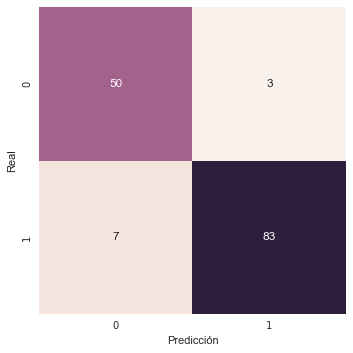

In [65]:
import seaborn as sns; sns.set()

ax = sns.heatmap(cnf_matrix, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicción')
ax.set_ylabel('Real')

La anterior matriz de confusión se ha obtenido con las predicciones obtenidas a partir de los datos de test, que solo eran una parte del conjunto de datos.

Para obtener la matriz de confusión usando validación cruzada, se puede usar **cross_val_predict**. 



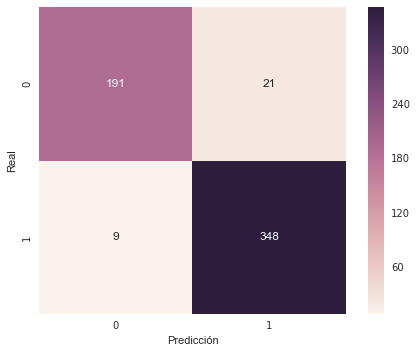

In [66]:
predicted = cross_val_predict(classifier, X, y, cv=5)
cnf_matrix = confusion_matrix(y, predicted)

ax = sns.heatmap(cnf_matrix, 
                 square=True, 
                 annot=True, # muestra los valores
                 fmt="d", # las etiquetas como entero
                 cbar=True) #muestra el color map
ax.set_xlabel('Predicción')
ax.set_ylabel('Real')



### Classification report

La función **classification_report** devuelve un informe en modo texto con las medidas de clasificación más importantes.


In [67]:
from sklearn.metrics import classification_report


report = classification_report(y_test, y_pred, target_names=target_names)
report.split("\n")

['             precision    recall  f1-score   support',
 '',
 '  malignant       0.88      0.94      0.91        53',
 '     benign       0.97      0.92      0.94        90',
 '',
 'avg / total       0.93      0.93      0.93       143',
 '']

### Medidas personalizadas

Adicionalmente podemos crear medidas personalizadas, ya sea porque no estén implementadas en Sklearn o porque en un problema específico queremos usar una medida propia.

En este caso a **cross_val_score** le pasamos una una función propia nuestra que tiene que recibir modelo X e y y devolver un único número

In [68]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score


# tiene que devolver un número
def personalizada(model, x, y):
    
    yPred = model.predict(x)
    
    return accuracy_score(y, yPred) / f1_score(y, yPred)

cross_val_score(classifier, X, y,scoring=personalizada, cv=10).mean()
   

0.98771812848037899

Podemos hacer una función propia que solo reciba y e y_pred y utilizarla con las predicciones devueltas por una validaciñon cruzada

In [69]:
from sklearn.metrics import make_scorer

def score_personalizado_func(y,yPred):
    return accuracy_score(y, yPred) / f1_score(y, yPred)

    



predicted = cross_val_predict(classifier, X, y, cv=10)
print(score_personalizado_func(y, predicted))



0.988106781407


O incluso se puede usar **make_scorer** para crear un score personalizado que se puede usar en GridSearchCV


In [70]:
from sklearn.metrics import make_scorer

score_personalizado = make_scorer(score_personalizado_func)

grid = GridSearchCV(svm.LinearSVC(), param_grid={'C': [1, 10]},
                    scoring=score_personalizado)
grid.fit(X,y)
grid.best_params_

{'C': 10}

# Otros

## Procesado y transformación de los datos

Hasta ahora hemos visto los conceptos fundamentales de Sklearn, pero siempre hemos asumido que tenemos los datos completamente limpios y ordenados. 

En el mundo real los datos dificilmente se encuentran en esta forma y a menudo es necesario hacer *feature engineering*: Tomar la información en la forma en la que se encuentra y transformarla en una conjunto de atributos que podemos usar.

Los casos más sofisticados de *feature engineering* suceden cuando trabajamos con imágenes y con textos, pero eso lo vamos a ver en futuras lecciones.

El paquete **sklearn.preprocessing** proporciona funciones para transformar los atributos y las clases y hacerlos más apropiados para los modelos:

- Estandarización, normalización.
- Representar variables categóricas.
- Tratamiento de valores missing (*Missing imputation*)
- Variables derivadas.

http://scikit-learn.org/stable/modules/preprocessing.html


### Feature Selection

Las clases de **sklearn.feature_selection** permiten realizar la selección de atributos usando distintos algoritmos.

Ejemplo 

El método más importante es **fit_transform** que aplica el algorimto y devuelve el conjunto de entrenamiento con los atributos seleccionados.

```Python
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)
```

http://scikit-learn.org/stable/modules/feature_selection.html

### Dimensionality Reduction

Cuando el número de atributos es muy alto puede ser necesario reducirlos de manera no supervisada, antes de aplicar un algoritmo supervisado.

En Sklearn hay algoritmos basados en proyecciones como PCA y algoritmos basados en Manifold como t-sne. 

http://scikit-learn.org/stable/modules/unsupervised_reduction.html

http://scikit-learn.org/stable/modules/manifold.html





## Mas recursos 
https://www.springboard.com/blog/data-mining-python-tutorial/

http://www.scipy-lectures.org/packages/scikit-learn/index.html

https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb